In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df = pd.read_excel("C:/Users/Yash/Desktop/ML_Projects/Data/Summer Intern Case Study Data_2023.xlsx")
df['Summary Group'] = df['Summary Group'].str.replace(' ', '')
df.head()

,Week,Event,Summary Group,Tactic,Execution,Sales Volume,Profit,Spend
0,2020-10-10,Amazon Display,Media,Amazon Display,3.492711,7.540394e+04,4524.236148,14515.210564
1,2020-10-10,Amazon Search,Media,Amazon Search,0.802291,9.079212e+04,5447.527383,15734.444640
2,2020-10-10,Competitive,Base,Competitive,0.000000,1.218384e+05,7310.306924,0.000000
3,2020-10-10,Core/Base,Base,Core/Base,0.000000,1.581304e+07,948782.305600,0.000000
4,2020-10-10,COVID,Base,COVID,0.000000,-7.462117e+05,-44772.703120,0.000000


In [36]:
df["Return_on_Investment"] = ((df["Profit"] - df["Spend"]) / df["Spend"]) * 100
df.tail()

,Week,Event,Summary Group,Tactic,Execution,Sales Volume,Profit,Spend,Return_on_Investment
3115,2022-10-01,Seasonality,Base,Seasonality,0.0,263411.7646,15804.70587,0.00000,inf
3116,2022-10-01,Trade Promo,Trade,Trade Promo,0.0,617804.4614,37068.26769,88556.85651,-58.141843
3117,2022-10-01,Trend,Base,Trend,0.0,224652.6735,13479.16041,0.00000,inf
3118,2022-10-01,VPC,Base,VPC,0.0,0.0000,0.00000,0.00000,NaN
3119,2022-10-01,YouTube,Media,YouTube,0.0,0.0000,0.00000,0.00000,NaN


In [37]:
df["Return_on_Investment"].value_counts()

 inf           576
-inf           267
-100.000000     46
-97.460757       1
 1.085340        1
              ... 
-29.133431       1
-75.940028       1
-74.870189       1
-61.142169       1
-58.141843       1
Name: Return_on_Investment, Length: 1450, dtype: int64

In [38]:
df['Return_on_Investment'] = df['Return_on_Investment'].fillna(0)
df["Return_on_Investment"].value_counts()

 0.000000      784
 inf           576
-inf           267
-100.000000     46
-97.460757       1
              ... 
-29.133431       1
-75.940028       1
-74.870189       1
-61.142169       1
-58.141843       1
Name: Return_on_Investment, Length: 1451, dtype: int64

In [39]:
df["Week"] = pd.to_datetime(df["Week"], format="%m/%d/%Y")
monthly_sales = df.groupby(pd.Grouper(key="Week", freq="M")).sum()["Sales Volume"]
sales_growth = monthly_sales.pct_change()
print(sales_growth)

Week
2020-10-31         NaN
2020-11-30   -0.053744
2020-12-31   -0.085467
2021-01-31    0.838484
2021-02-28   -0.376797
2021-03-31    0.135098
2021-04-30   -0.112648
2021-05-31    0.120525
2021-06-30   -0.251250
2021-07-31    0.323452
2021-08-31    0.235179
2021-09-30   -0.110440
2021-10-31    0.043208
2021-11-30   -0.254851
2021-12-31    0.039655
2022-01-31    0.622160
2022-02-28   -0.364341
2022-03-31   -0.015062
2022-04-30    0.075278
2022-05-31   -0.219168
2022-06-30   -0.093990
2022-07-31    0.221244
2022-08-31   -0.048502
2022-09-30   -0.078358
2022-10-31   -0.766016
Freq: M, Name: Sales Volume, dtype: float64


In [40]:
type(monthly_sales)

pandas.core.series.Series

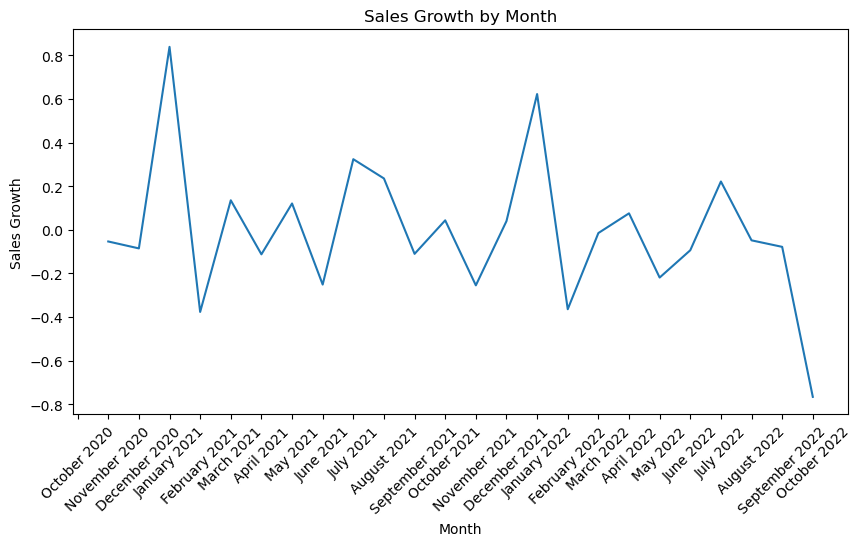

In [41]:
s = pd.Series(data=[None, -0.053744, -0.085467, 0.838484, -0.376797, 0.135098, -0.112648,
                    0.120525, -0.251250, 0.323452, 0.235179, -0.110440, 0.043208, -0.254851,
                    0.039655, 0.622160, -0.364341, -0.015062, 0.075278, -0.219168, -0.093990,
                    0.221244, -0.048502, -0.078358, -0.766016],
              index=pd.date_range(start='2020-10-31', periods=25, freq='M'))

s.index = s.index.strftime('%B %Y')

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(s.index, s)
ax.set_xlabel('Month')
plt.xticks(rotation=45)
ax.set_ylabel('Sales Growth')
ax.set_title('Sales Growth by Month')
plt.show()


In [42]:
df['month_name'] = df['Week'].dt.strftime('%B')
df['year'] = df['Week'].dt.year
monthly_profit = df.groupby(['month_name', 'year'])["Profit"].sum()
print(monthly_profit)

month_name  year
April       2021    4.655417e+06
            2022    5.012806e+06
August      2021    6.384911e+06
            2022    4.120803e+06
December    2020    4.034037e+06
            2021    4.590218e+06
February    2021    4.621991e+06
            2022    4.733158e+06
January     2021    7.416511e+06
            2022    7.446069e+06
July        2021    5.169221e+06
            2022    4.330860e+06
June        2021    3.905861e+06
            2022    3.546268e+06
March       2021    5.246414e+06
            2022    4.661868e+06
May         2021    5.216512e+06
            2022    3.914161e+06
November    2020    4.411034e+06
            2021    4.415134e+06
October     2020    4.661567e+06
            2021    5.925169e+06
            2022    8.886470e+05
September   2021    5.679759e+06
            2022    3.797904e+06
Name: Profit, dtype: float64


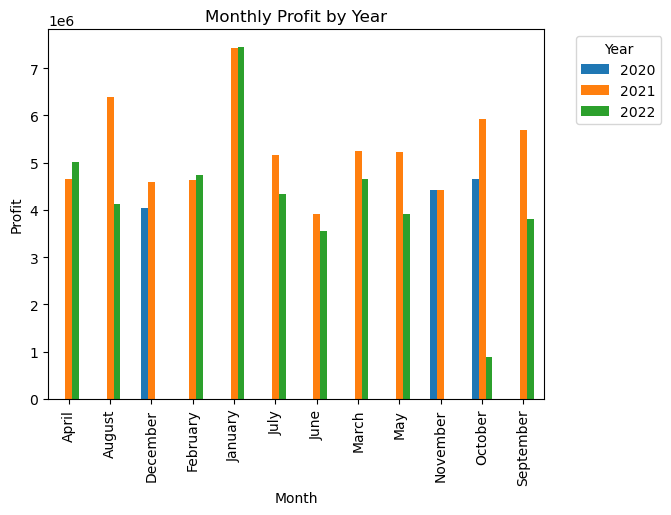

In [43]:
monthly_profit = monthly_profit.reset_index().pivot(index='month_name', columns='year', values='Profit')

# plot a bar plot
ax = monthly_profit.plot(kind='bar')
ax.set_xlabel('Month')
ax.set_ylabel('Profit')
ax.set_title('Monthly Profit by Year')
ax.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.show()

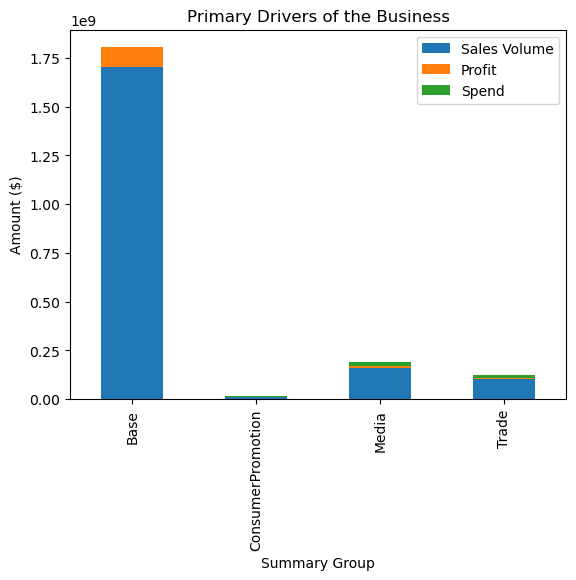

In [44]:
grouped_data = df.groupby('Summary Group').sum()[['Sales Volume', 'Profit', 'Spend']]
grouped_data.plot(kind='bar', stacked=True)
plt.ylabel('Amount ($)')
plt.title('Primary Drivers of the Business')
plt.show()

In [45]:
grouped_data = grouped_data.sort_values(by="Profit", ascending = False)
print(grouped_data)

                   Sales Volume        Profit         Spend
Summary Group                                              
Base               1.702652e+09  1.021591e+08  0.000000e+00
Media              1.619078e+08  9.714469e+06  1.675635e+07
Trade              1.037003e+08  6.222021e+06  1.267035e+07
ConsumerPromotion  1.151139e+07  6.906833e+05  2.698325e+06


In [46]:
grouped_data["ROI"] = ((grouped_data["Profit"] - grouped_data["Spend"]) / grouped_data["Spend"]) * 100
grouped_data

,Sales Volume,Profit,Spend,ROI
Summary Group,,,,
Base,1.702652e+09,1.021591e+08,0.000000e+00,inf
Media,1.619078e+08,9.714469e+06,1.675635e+07,-42.025136
Trade,1.037003e+08,6.222021e+06,1.267035e+07,-50.893058
ConsumerPromotion,1.151139e+07,6.906833e+05,2.698325e+06,-74.403257


In [47]:
grouped = df.groupby('Summary Group')

In [61]:
base_df = df[df['Summary Group'] == 'Base']
media_df = df[df['Summary Group'] == 'Media']
trade_df = df[df['Summary Group'] == 'Trade']
consumer_promo_df = df[df['Summary Group'] == 'ConsumerPromotion']

In [66]:
base_df

,Week,Event,Summary Group,Tactic,Execution,Sales Volume,Profit,Spend,Return_on_Investment,month_name,year
2,2020-10-10,Competitive,Base,Competitive,0.0,1.218384e+05,7310.306924,0.0,inf,October,2020
3,2020-10-10,Core/Base,Base,Core/Base,0.0,1.581304e+07,948782.305600,0.0,inf,October,2020
4,2020-10-10,COVID,Base,COVID,0.0,-7.462117e+05,-44772.703120,0.0,-inf,October,2020
7,2020-10-10,Distribution,Base,Distribution,0.0,6.492850e+04,3895.710300,0.0,inf,October,2020
13,2020-10-10,New Subscribe & Save,Base,New Subscribe & Save,0.0,3.062327e+04,1837.396447,0.0,inf,October,2020
...,...,...,...,...,...,...,...,...,...,...,...
3103,2022-10-01,New Subscribe & Save,Base,New Subscribe & Save,0.0,4.486856e+04,2692.113363,0.0,inf,October,2022
3112,2022-10-01,Price,Base,Price,0.0,-8.863422e+05,-53180.531040,0.0,-inf,October,2022
3115,2022-10-01,Seasonality,Base,Seasonality,0.0,2.634118e+05,15804.705870,0.0,inf,October,2022
3117,2022-10-01,Trend,Base,Trend,0.0,2.246527e+05,13479.160410,0.0,inf,October,2022


In [67]:
media_df

,Week,Event,Summary Group,Tactic,Execution,Sales Volume,Profit,Spend,Return_on_Investment,month_name,year
0,2020-10-10,Amazon Display,Media,Amazon Display,3.492711,7.540394e+04,4524.236148,14515.210564,-68.831068,October,2020
1,2020-10-10,Amazon Search,Media,Amazon Search,0.802291,9.079212e+04,5447.527383,15734.444640,-65.378331,October,2020
5,2020-10-10,Digital Display,Media,Digital Display,43.251484,1.843165e+06,110589.919000,95935.876380,15.274831,October,2020
8,2020-10-10,Ecomm: Retail Display - Dollar General,Media,Ecomm: Retail Display,0.000000,0.000000e+00,0.000000,0.000000,0.000000,October,2020
9,2020-10-10,Ecomm: Retail Display - Target,Media,Ecomm: Retail Display,0.000000,0.000000e+00,0.000000,0.000000,0.000000,October,2020
...,...,...,...,...,...,...,...,...,...,...,...
3108,2022-10-01,Paid Social: Meta,Media,Paid Social: Meta,0.000000,0.000000e+00,0.000000,0.000000,0.000000,October,2022
3109,2022-10-01,Paid Social: Pinterest,Media,Paid Social: Pinterest,0.000375,9.684746e+02,58.108474,1.850603,3039.974288,October,2022
3110,2022-10-01,Paid Social: Twitter,Media,Paid Social: Twitter,0.000000,0.000000e+00,0.000000,0.000000,0.000000,October,2022
3111,2022-10-01,PR,Media,PR,0.241373,1.392311e+04,835.386808,115909.615500,-99.279277,October,2022


In [68]:
trade_df

,Week,Event,Summary Group,Tactic,Execution,Sales Volume,Profit,Spend,Return_on_Investment,month_name,year
26,2020-10-10,Trade Promo,Trade,Trade Promo,0.0,1.528335e+06,91700.10279,153218.57350,-40.150792,October,2020
56,2020-10-17,Trade Promo,Trade,Trade Promo,0.0,8.527171e+05,51163.02304,153218.57350,-66.607819,October,2020
86,2020-10-24,Trade Promo,Trade,Trade Promo,0.0,4.986595e+05,29919.57082,153218.57350,-80.472621,October,2020
116,2020-10-31,Trade Promo,Trade,Trade Promo,0.0,7.152963e+05,42917.78065,153218.57350,-71.989179,October,2020
146,2020-11-07,Trade Promo,Trade,Trade Promo,0.0,5.613014e+05,33678.08119,141030.04570,-76.119925,November,2020
...,...,...,...,...,...,...,...,...,...,...,...
2996,2022-09-03,Trade Promo,Trade,Trade Promo,0.0,8.130028e+05,48780.16964,88556.85651,-44.916552,September,2022
3026,2022-09-10,Trade Promo,Trade,Trade Promo,0.0,9.375290e+05,56251.74106,88556.85651,-36.479519,September,2022
3056,2022-09-17,Trade Promo,Trade,Trade Promo,0.0,1.121233e+06,67273.99812,88556.85651,-24.032988,September,2022
3086,2022-09-24,Trade Promo,Trade,Trade Promo,0.0,7.701033e+05,46206.19506,88556.85651,-47.823131,September,2022


In [69]:
consumer_promo_df

,Week,Event,Summary Group,Tactic,Execution,Sales Volume,Profit,Spend,Return_on_Investment,month_name,year
6,2020-10-10,Digital FSI,ConsumerPromotion,Digital Coupons,0.00000,0.00000,0.000000,0.000000,0.000000,October,2020
11,2020-10-10,Ibotta,ConsumerPromotion,Digital Coupons,0.00000,0.00000,0.000000,0.000000,0.000000,October,2020
23,2020-10-10,Quatient Media,ConsumerPromotion,Digital Coupons,0.00000,0.00000,0.000000,0.000000,0.000000,October,2020
24,2020-10-10,Sampling,ConsumerPromotion,Sampling,11538.46154,0.00000,0.000000,6576.923077,-100.000000,October,2020
36,2020-10-17,Digital FSI,ConsumerPromotion,Digital Coupons,0.00000,0.00000,0.000000,0.000000,0.000000,October,2020
...,...,...,...,...,...,...,...,...,...,...,...
3084,2022-09-24,Sampling,ConsumerPromotion,Sampling,0.00000,0.00000,0.000000,0.000000,0.000000,September,2022
3096,2022-10-01,Digital FSI,ConsumerPromotion,Digital Coupons,0.00000,0.00000,0.000000,0.000000,0.000000,October,2022
3101,2022-10-01,Ibotta,ConsumerPromotion,Digital Coupons,0.01117,634.86768,38.092061,74.825011,-49.091808,October,2022
3113,2022-10-01,Quatient Media,ConsumerPromotion,Digital Coupons,0.00000,0.00000,0.000000,0.000000,0.000000,October,2022


In [70]:
df.columns

Index(['Week', 'Event', 'Summary Group', 'Tactic', 'Execution', 'Sales Volume',
       'Profit', 'Spend', 'Return_on_Investment', 'month_name', 'year'],
      dtype='object')

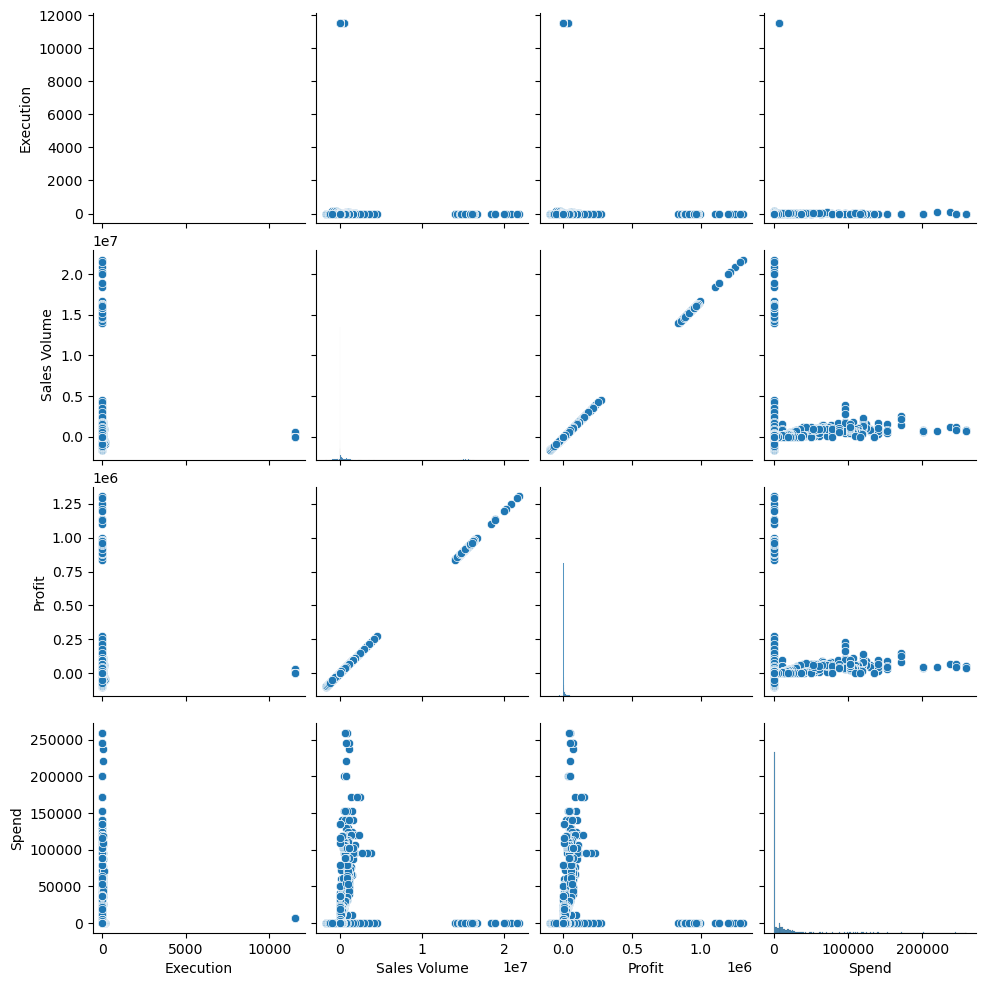

In [71]:
sns.pairplot(df[['Week', 'Event', 'Summary Group', 'Tactic', 'Execution', 'Sales Volume', 'Profit', 'Spend']])

C:\Users\Yash\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Profit', ylabel='Density'>

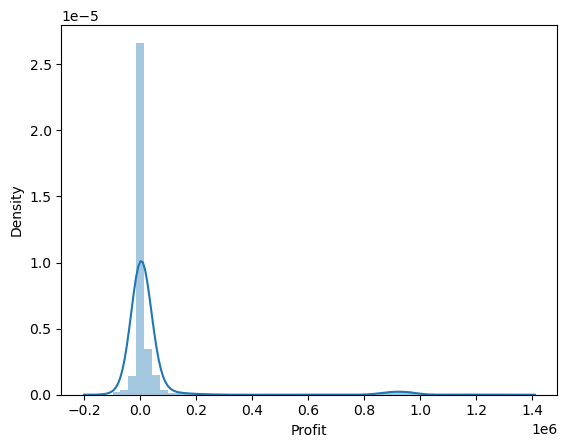

In [72]:
sns.distplot(df["Profit"])

C:\Users\Yash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Profit'>

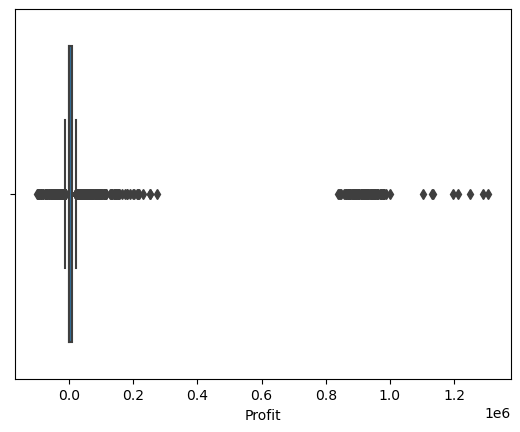

In [74]:
sns.boxplot(df["Profit"])

<AxesSubplot:>

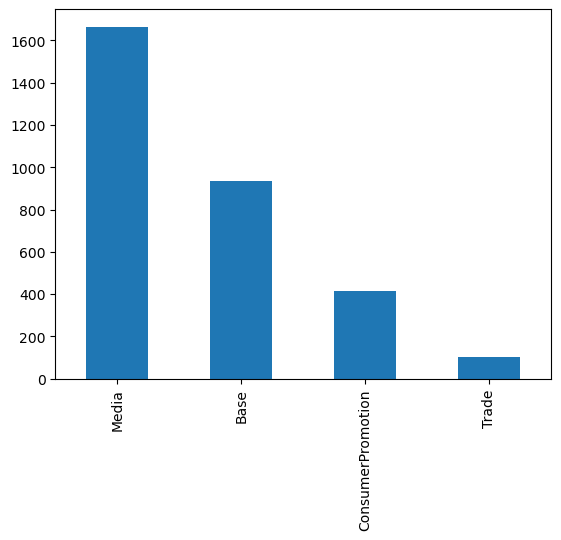

In [75]:
df["Summary Group"].value_counts().plot(kind="bar")

<AxesSubplot:>

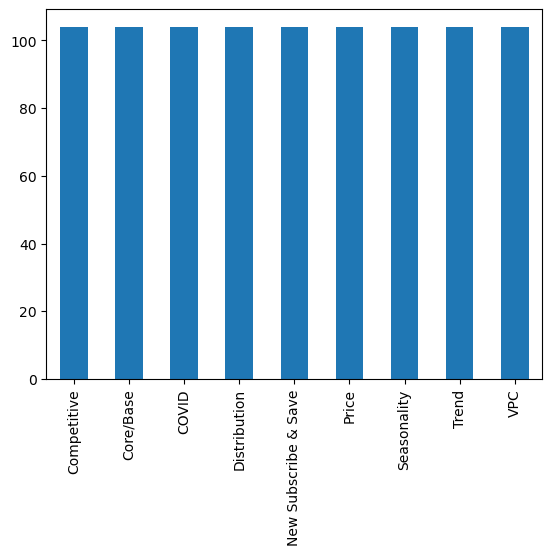

In [76]:
base_df["Tactic"].value_counts().plot(kind="bar")

<AxesSubplot:>

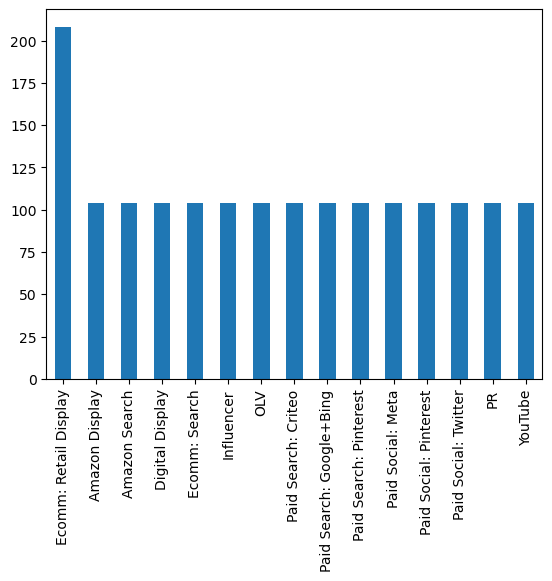

In [77]:
media_df["Tactic"].value_counts().plot(kind="bar")

<AxesSubplot:>

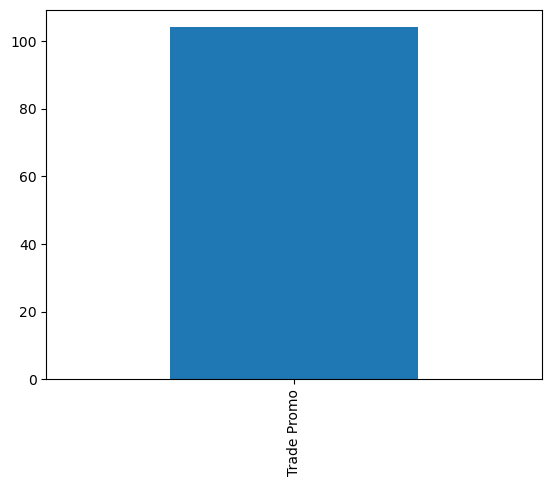

In [78]:
trade_df["Tactic"].value_counts().plot(kind="bar")

<AxesSubplot:>

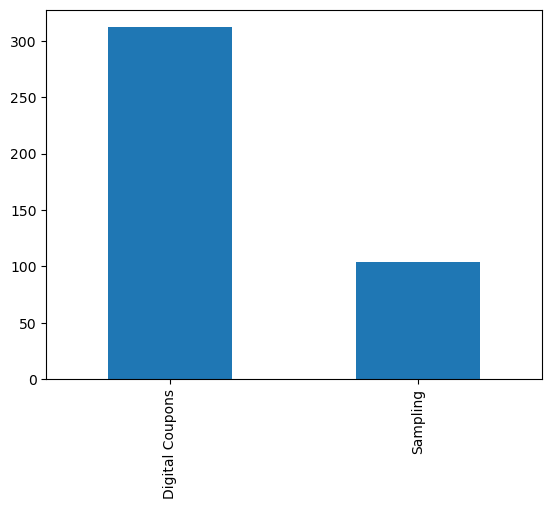

In [79]:
consumer_promo_df["Tactic"].value_counts().plot(kind="bar")

In [83]:
df["Profit"].describe()

count    3.120000e+03
mean     3.807253e+04
std      1.706069e+05
min     -9.904857e+04
25%      0.000000e+00
50%      5.130136e+02
75%      8.394210e+03
max      1.306796e+06
Name: Profit, dtype: float64

In [84]:
df.head()

,Week,Event,Summary Group,Tactic,Execution,Sales Volume,Profit,Spend,Return_on_Investment,month_name,year
0,2020-10-10,Amazon Display,Media,Amazon Display,3.492711,7.540394e+04,4524.236148,14515.210564,-68.831068,October,2020
1,2020-10-10,Amazon Search,Media,Amazon Search,0.802291,9.079212e+04,5447.527383,15734.444640,-65.378331,October,2020
2,2020-10-10,Competitive,Base,Competitive,0.000000,1.218384e+05,7310.306924,0.000000,inf,October,2020
3,2020-10-10,Core/Base,Base,Core/Base,0.000000,1.581304e+07,948782.305600,0.000000,inf,October,2020
4,2020-10-10,COVID,Base,COVID,0.000000,-7.462117e+05,-44772.703120,0.000000,-inf,October,2020


<AxesSubplot:xlabel='Summary Group', ylabel='Profit'>

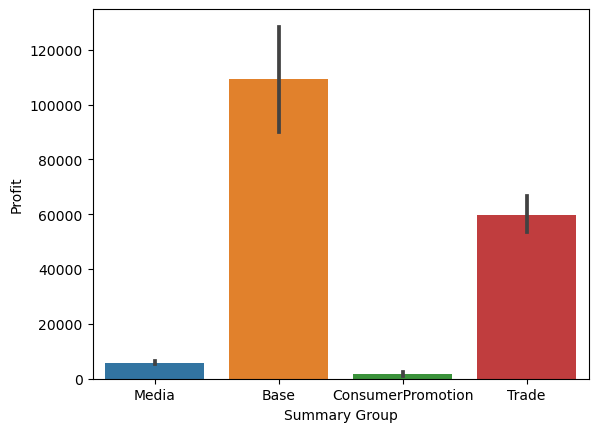

In [86]:
sns.barplot(x=df["Summary Group"], y=df["Profit"])

<AxesSubplot:xlabel='Summary Group', ylabel='Spend'>

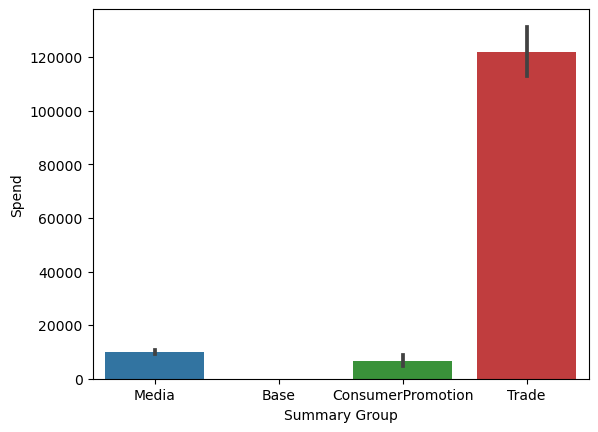

In [87]:
sns.barplot(x=df["Summary Group"], y=df["Spend"])

<AxesSubplot:xlabel='Summary Group', ylabel='Sales Volume'>

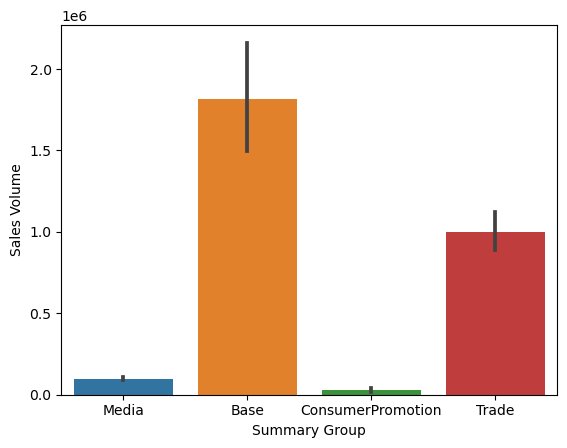

In [91]:
sns.barplot(x=df["Summary Group"], y=df["Sales Volume"])
#plt.xticks(rotation='vertical')

In [94]:
df["Summary Group"].unique()

array(['Media', 'Base', 'ConsumerPromotion', 'Trade'], dtype=object)

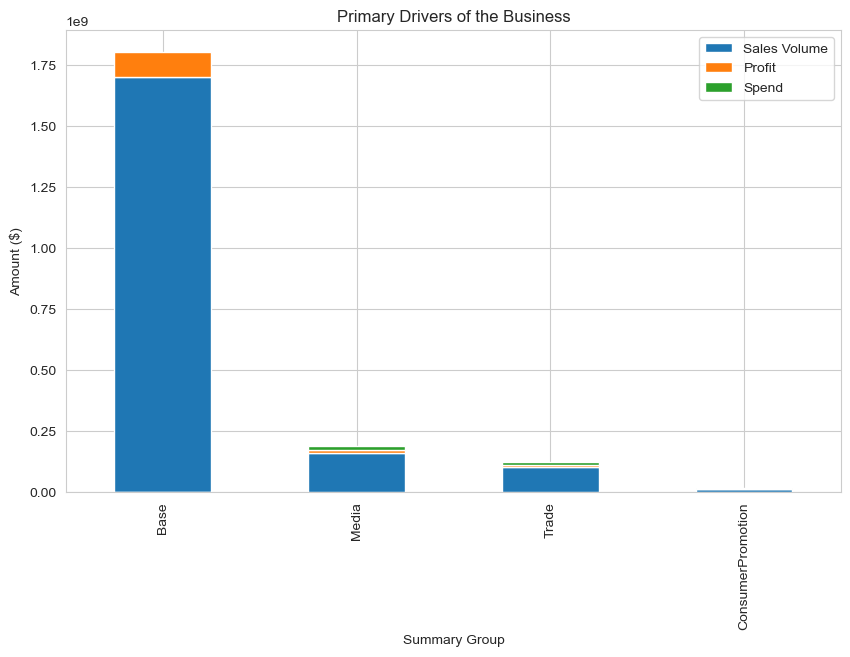

In [92]:
grouped_data = df.groupby('Summary Group').sum()[['Sales Volume', 'Profit', 'Spend']]
grouped_data = grouped_data.sort_values(by="Profit", ascending=False)

sns.set_style("whitegrid")
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_ylabel('Amount ($)')
ax.set_title('Primary Drivers of the Business')
plt.show()

In [93]:
consumer_promo_df.describe()

,Execution,Sales Volume,Profit,Spend,Return_on_Investment,year
count,416.000000,4.160000e+02,416.000000,416.000000,416.000000,416.000000
mean,1443.272568,2.767161e+04,1660.296376,6486.357909,-31.396352,2021.269231
std,3820.222554,1.085913e+05,6515.477660,22150.158523,76.044044,0.654633
min,0.000000,0.000000e+00,0.000000,0.000000,-100.000000,2020.000000
25%,0.000000,0.000000e+00,0.000000,0.000000,-85.064067,2021.000000
50%,0.000526,0.000000e+00,0.000000,4.527035,-24.416483,2021.000000
75%,0.301344,1.430965e+03,85.857912,6576.923077,0.000000,2022.000000
max,11538.461540,1.154802e+06,69288.145010,237127.280000,844.599473,2022.000000


<AxesSubplot:xlabel='Tactic', ylabel='Profit'>

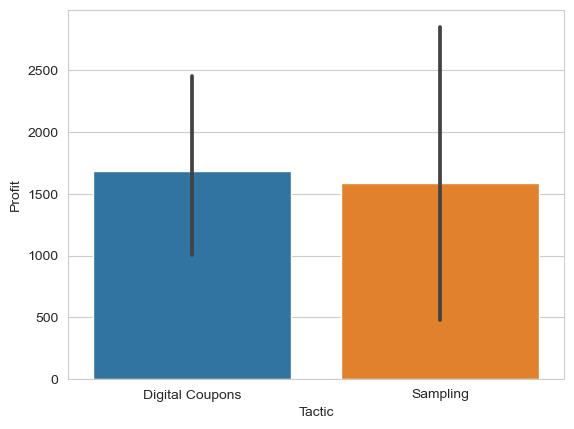

In [95]:
sns.barplot(x=consumer_promo_df["Tactic"],y=consumer_promo_df["Profit"])

C:\Users\Yash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Profit'>

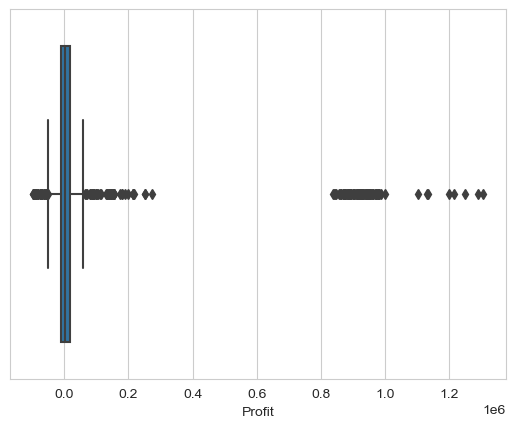

In [96]:
sns.boxplot(base_df["Profit"])

C:\Users\Yash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Profit'>

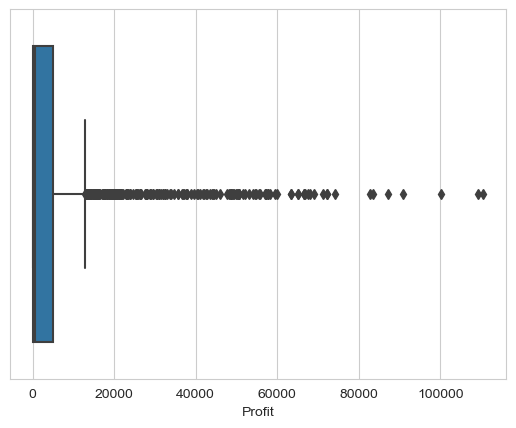

In [97]:
sns.boxplot(media_df["Profit"])

C:\Users\Yash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Profit'>

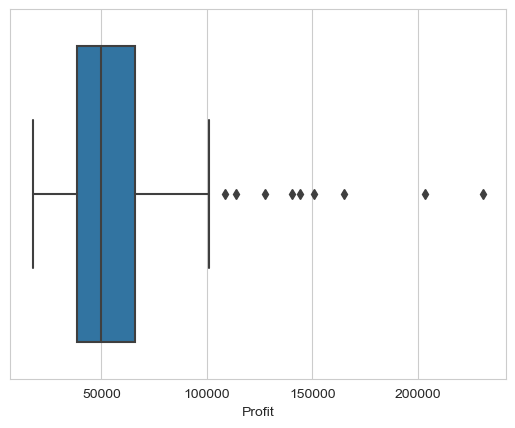

In [98]:
sns.boxplot(trade_df["Profit"])

C:\Users\Yash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Profit'>

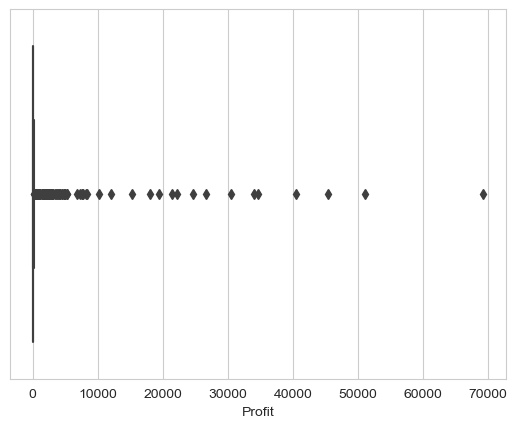

In [99]:
sns.boxplot(consumer_promo_df["Profit"])

In [101]:
max_Profit = df["Profit"].max()
max_Profit

1306795.662